<a href="https://colab.research.google.com/github/dawidkubicki/kaggle-dogs-vs-cats/blob/main/kaggle_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

'2.4.3'

### Google Colab actions

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# import os
#
# root_dir = "/content/gdrive/My Drive/Colab Notebooks/delepy/projects"
#
# def create_and_set_working_directory(root_dir):
#   if os.path.isdir(root_dir) == True:
#     print("Path correcct 😊")
#   else:
#     print("Incorrect path ☠️")
#     os.mkdir(root_dir)
#     print(root_dir + ' did not exist but was created.')
#
#   # change the OS to use your project folder as the working directory
#   os.chdir(root_dir)
#
#   # create a test file to make sure it shows up in the right place
#   !touch 'WORKING_DIRECTORY_JUST_TO_TEST_FILE.txt'
#   print('\nYour working directory was changed to ' + root_dir + \
#         "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )
#
# create_and_set_working_directory(root_dir)

## Plan of attack
### First of all I will train the model from the scratch. I'll use convolutional neural network on 2000 items without regularization. This will create a reference point. Then, I'll use data augmentation to increase accuracy of the model.
#### In the end, it'll be good to try feature extraction with a previously trained network and a little bit of tunning if the final neural network.

In [5]:
import os, shutil
import os.path

#path to oryginal full downloaded dataset
original_dataset_dir = '/Users/dawidkubicki/Documents/dataset/dogs-vs-cats'

#directory where the new files will be included
base_dir = '/Users/dawidkubicki/Documents/dataset/cats_and_dogs_small'

if os.path.exists('/Users/dawidkubicki/Documents/dataset/cats_and_dogs_small'):
    print ("File exist")
else:
    os.mkdir(base_dir)
    print ("File created")

File created


### Let's create directories for subdatasets (training, validation and test)

In [6]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

### Catalogue with training set of cats photos

In [7]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

### Catalogue of training set of dogs photos

In [8]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

### Catalogue of validation set of cats

In [9]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

### Catalogue of validation set of dogs

In [10]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)


### Catalogue of test set of cats

In [11]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

### Catalogue of test set of dogs

In [12]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

### Copy 1000 first images of cats to train_cats_dir

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)

### Copy 500 next images of cats to validation_cats_dir

In [14]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)

### Copy 500 next images of cats to test_cats_dir

In [15]:
fnames = ['cat.{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)

### Copy 1000 first images of dogs to train_dogs_dir

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)

### Copy 500 next images of dogs to validation_dogs_dir

In [17]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)

### Copy 500 next images of dogs to test_dogs_dir

In [18]:
fnames = ['dog.{}.jpg'.format(i) for i in range(2000,2500)]
for fname in fnames:
        src = os.path.join(original_dataset_dir+'/train', fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)

### Let's check how many images we have in our new dataset

In [19]:
print('Number of training images of cats', len(os.listdir(train_cats_dir)))

Number of training images of cats 1000


In [20]:
print('Number of training images of dogs', len(os.listdir(train_dogs_dir)))

Number of training images of dogs 1000


In [21]:
print('Number of validation images of cats', len(os.listdir(validation_cats_dir)))

Number of validation images of cats 500


In [22]:
print('Number of validation images of dogs', len(os.listdir(validation_dogs_dir)))

Number of validation images of dogs 500


In [23]:
print('Number of test images of cats', len(os.listdir(test_cats_dir)))

Number of test images of cats 500


In [24]:
print('Number of test images of dogs', len(os.listdir(validation_dogs_dir)))

Number of test images of dogs 500


### Neural network creation

In [25]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [27]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### Load images with ImageDataDenerator class from Keras

In [28]:
from keras.preprocessing.image import ImageDataGenerator

#rescale pixel values from 0-255 to [0-1] range, because it's easier to nn to work with small inputs
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Fit the model with generating batches

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

#model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 33s 334ms/step - loss: 0.6907 - acc: 0.5410 - val_loss: 0.6810 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 32s 318ms/step - loss: 0.6702 - acc: 0.5840 - val_loss: 0.6596 - val_acc: 0.6400
Epoch 3/30
100/100 [==============================] - 31s 313ms/step - loss: 0.6407 - acc: 0.6320 - val_loss: 0.6292 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 31s 308ms/step - loss: 0.5987 - acc: 0.6775 - val_loss: 0.6007 - val_acc: 0.6910
Epoch 5/30
100/100 [==============================] - 30s 298ms/step - loss: 0.5602 - acc: 0.7085 - val_loss: 0.5845 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 30s 302ms/step - loss: 0.5212 - acc: 0.7320 - val_loss: 0.5789 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 29s 290ms/step - loss: 0.4899 - acc: 0.7670 - val_loss: 0.5718 - val_acc: 0.7130
Epoch 8/30
100/100 [==============================] - 3

In [32]:
model.save('/Users/dawidkubicki/Documents/dataset/cats_and_dogs_small_1.h5')

### Plots generating with cost and validation function during the training

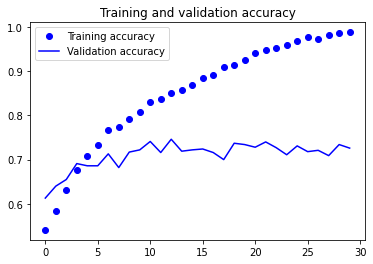

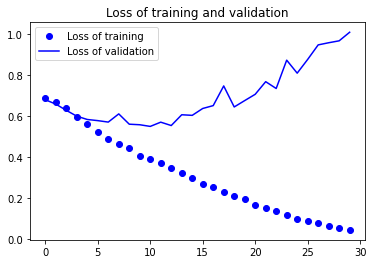

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']b
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Loss of training")
plt.plot(epochs, val_loss, 'b', label="Loss of validation")
plt.title('Loss of training and validation')
plt.legend()

plt.show()

#### Overfitting is probably cased by too small dataset (so I'll try to use Data Augmentation)

### Configuration of ImageDataGenerator class for data augmentation

In [36]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Displaying examples od random modified images

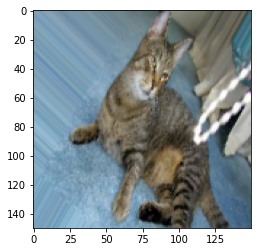

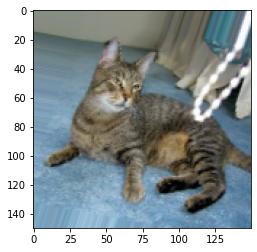

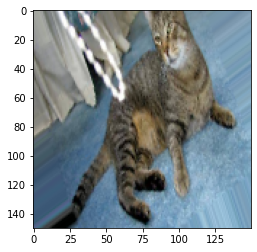

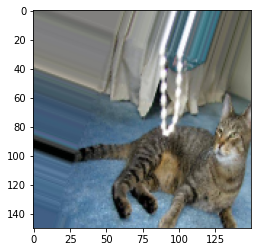

In [39]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x=image.img_to_array(img)
x=x.reshape((1,) + x.shape)


# .flow() generates batches of images modified by random
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()        

### New convolutional neural network with dropout

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### Training with augmentation of the data

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# do not modife test set
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=25,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=25,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('/Users/dawidkubicki/Documents/dataset/cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
80/80 [==============================] - 29s 368ms/step - loss: 0.5284 - acc: 0.7320 - val_loss: 0.5317 - val_acc: 0.7370
Epoch 2/100
54/80 [===================>..........] - ETA: 8s - loss: 0.5082 - acc: 0.7467

KeyboardInterrupt: 